## Analisis Prediksi Keberhasilan Penjualan Tinggi Video Games Secara Global

```

~~~

In [1]:
# Import Library
import pandas as pd 
import numpy as np

# Screen Display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Import Library Visualisasi Utama
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Library Visualisasi Tambahan
from plotly.subplots import make_subplots
from plotly import data
import plotly.graph_objects as go
from matplotlib.patches import ConnectionPatch

In [3]:
# Library Preprocessing Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Library Supervised Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Library Evaluation Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 1. Akuisisi Data

In [4]:
dataset = pd.read_csv("../Dataset/vgsales.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16287 entries, 0 to 16286
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16287 non-null  int64  
 1   Name          16287 non-null  object 
 2   Platform      16287 non-null  object 
 3   Year          16287 non-null  float64
 4   Genre         16287 non-null  object 
 5   Publisher     16287 non-null  object 
 6   NA_Sales      16287 non-null  float64
 7   EU_Sales      16287 non-null  float64
 8   JP_Sales      16287 non-null  float64
 9   Other_Sales   16287 non-null  float64
 10  Global_Sales  16287 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16282,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16283,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16284,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16285,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### 2. Praproses Data

In [6]:
dataset.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
dataset = dataset.bfill()

In [8]:
dataset.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000
mean,8288.969853,2006.402775,0.265695,0.147768,0.078849,0.048437,0.541022
std,4792.138597,5.830382,0.822525,0.509360,0.311916,0.190105,1.567520
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4131.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8291.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12437.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


##### Step 1 - Unique Values

In [9]:
# Get Unique on Name
print("Name : "+str(
  np.sort(dataset["Name"].unique())
))

Name : ["'98 Koshien" '.hack//G.U. Vol.1//Rebirth' '.hack//G.U. Vol.2//Reminisce'
 ... 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']


In [10]:
# Get Unique on Platform
print("Platform : "+str(
  np.sort(dataset["Platform"].unique())
))

Platform : ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


In [11]:
# Get Unique on Genre
print("Genre : "+str(
  np.sort(dataset["Genre"].unique())
))

Genre : ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [12]:
# Get Unique on Publisher
print("Publisher : "+str(
  np.sort(dataset["Publisher"].unique())
))

Publisher : ['10TACLE Studios' '1C Company' '20th Century Fox Video Games' '2D Boy'
 '3DO' '49Games' '505 Games' '5pb' '7G//AMES' '989 Sports' '989 Studios'
 'AQ Interactive' 'ASC Games' 'ASCII Entertainment' 'ASCII Media Works'
 'ASK' 'Abylight' 'Acclaim Entertainment' 'Accolade' 'Ackkstudios'
 'Acquire' 'Activision' 'Activision Blizzard' 'Activision Value'
 'Adeline Software' 'Aerosoft' 'Agatsuma Entertainment' 'Agetec'
 'Aksys Games' 'Alawar Entertainment' 'Alchemist' 'Alternative Software'
 'Altron' 'Alvion' 'American Softworks' 'Angel Studios' 'Answer Software'
 'Aqua Plus' 'Aques' 'Arc System Works' 'Arena Entertainment' 'Aria'
 'Arika' 'ArtDink' 'Aruze Corp' 'Ascaron Entertainment'
 'Ascaron Entertainment GmbH' 'Asgard' 'Asmik Ace Entertainment'
 'Asmik Corp' 'Aspyr' 'Astragon' 'Asylum Entertainment' 'Atari' 'Athena'
 'Atlus' 'Avalon Interactive' 'Avanquest' 'Avanquest Software' 'Axela'
 'BAM! Entertainment' 'BMG Interactive Entertainment' 'BPS' 'Banpresto'
 'Benesse' 'Berkeley'

### 3. Eksplorasi Data Analisis (EDA)

##### Step 1 - Visualisasi Data

In [13]:
df_region = dataset[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].aggregate("sum").reset_index()
df_region.columns = ["Region", "Sales"]
df_region

,Region,Sales
0,NA_Sales,4327.38
1,EU_Sales,2406.69
2,JP_Sales,1284.22
3,Other_Sales,788.89


In [14]:
# Create Barplot
fig = px.bar(df_region, y="Region", x="Sales", text_auto='.4s')
fig.update_traces(marker_color=px.colors.sequential.Bluyl_r)
fig.update_layout(title="Sum of games sales by regions", xaxis_title="", yaxis_title="")
fig.show()

In [15]:
# Create Pieplot
fig = px.pie(df_region, values="Sales", names="Region", hole=0.5, color_discrete_sequence=px.colors.sequential.Bluyl_r)

# Update Labels
fig.update_traces(textinfo="percent")
fig.update_layout(title="Percentage of games sales by region")

# Return Values
fig.show()

In [16]:
df_yearsales_region = dataset.groupby("Year")[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].aggregate("sum").sort_values(by=['Global_Sales'],ascending=False).reset_index()
df_yearsales_region = df_yearsales_region.head(5)

In [17]:
df = df_yearsales_region
df

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2008.0,351.44,184.40,60.26,82.39,678.90
1,2009.0,338.85,191.59,61.89,74.77,667.30
2,2007.0,311.18,160.18,60.29,77.58,609.92
3,2010.0,304.24,176.57,59.49,59.90,600.29
4,2006.0,263.12,129.24,73.73,54.43,521.04


In [18]:
df_region

,Region,Sales
0,NA_Sales,4327.38
1,EU_Sales,2406.69
2,JP_Sales,1284.22
3,Other_Sales,788.89


In [19]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_yearsales_region.Year, y=df_region.Sales,
                base=df_region.Sales,
                marker_color='crimson',
                name='ascend'))
fig.add_trace(go.Bar(x=df_yearsales_region.Year, y=df_region.Sales,
                base=0,
                marker_color='lightslategrey',
                name='descent'))

fig.update_layout(
    title="Sales Traffic from 4 Regions per Total", 
    xaxis=dict(tickangle=-45, tickfont=dict(size=12, family="Courier New, monospace")),
    yaxis=dict(tickfont=dict(size=12, family="Courier New, monospace")),
    showlegend=True,

    paper_bgcolor='lightgrey',
    plot_bgcolor='rgba(128, 128, 128, 1)',

    xaxis_title="Tahun", 
    yaxis_title="Jumlah Penjualan (jutaan unit)"
    
)

fig.show()

In [20]:
df = dataset.groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].aggregate("sum")
df = df.sort_values(by=["Global_Sales"]).reset_index().tail(5)
df

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
26,DS,388.26,194.05,175.02,60.27,818.62
27,Wii,497.37,264.35,68.28,79.20,909.81
28,PS3,388.90,340.47,79.21,140.81,949.35
29,X360,594.33,278.00,12.30,84.67,969.60
30,PS2,572.92,332.63,137.54,190.47,1233.46


In [21]:
# Create Barplot
fig = px.bar(df, y="Platform", x="Global_Sales", text_auto='.4s')
fig.update_traces(marker_color=px.colors.sequential.Bluyl_r)
fig.update_layout(title="Best platform by regions", xaxis_title="", yaxis_title="")
fig.show()

In [22]:
df = df

fig = make_subplots(rows=1, cols=4, shared_yaxes=True)

fig.add_trace(
    go.Bar(y=df.Platform, x=df.NA_Sales, name="North America", marker=dict(cornerradius=30), orientation='h'),
    1, 1
)
fig.add_trace(
    go.Bar(y=df.Platform, x=df.EU_Sales, name="Europe", marker=dict(cornerradius=30), orientation='h'),
    1, 2,
)

fig.add_trace(
    go.Bar(y=df.Platform, x=df.JP_Sales, name="Japanese", marker=dict(cornerradius="40%"), orientation='h'),
    1, 3,
)

fig.add_trace(
    go.Bar(y=df.Platform, x=df.Other_Sales, name="Others", marker=dict(cornerradius="40%"), orientation='h'),
    1, 4,
)

fig.update_traces(
    marker_color=px.colors.sequential.algae_r
)

fig.update_layout(
    title="5 Most Frequent Platforms from Global Sales figures", 
    xaxis_title="Sales", 
    yaxis_title="Platform"
)

fig.update_layout(barmode='group')
fig.show()

In [23]:
df = df

fig = go.Figure()

df=[
    fig.add_trace(
        go.Bar(y=df["Platform"], x=df["NA_Sales"], name="North America", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Platform"], x=df["EU_Sales"], name="Europe", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Platform"], x=df["JP_Sales"], name="Japanese", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Platform"], x=df["Other_Sales"], name="Others", orientation='h')
    ),
],

layout=dict(
    barcornerradius=15,
),

fig.update_traces(
    marker_color=px.colors.sequential.algae_r
)

fig.update_layout(
    title="5 Most Frequent Platforms from Global Sales Figures", 
    xaxis_title="Sales", 
    yaxis_title="Platform",
    barmode='group'
)

fig.show()


In [24]:
df = dataset.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].aggregate("sum")
df = df.sort_values(by=["Global_Sales"]).reset_index().tail(5)
df = df
df

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7,Platform,445.99,200.65,130.65,51.51,829.13
8,Role-Playing,326.50,187.57,350.25,59.38,923.79
9,Shooter,575.16,310.45,38.18,101.90,1026.20
10,Sports,670.09,371.34,134.76,132.65,1309.24
11,Action,861.77,516.48,158.64,184.92,1722.83


In [25]:
# Create Barplot
fig = px.bar(df, y="Genre", x="Global_Sales", text_auto='.4s')
fig.update_traces(marker_color=px.colors.sequential.Bluyl_r)
fig.update_layout(title="Best Genre by Regions", xaxis_title="", yaxis_title="")
fig.show()

In [26]:
df = df

fig = make_subplots(rows=1, cols=4, shared_yaxes=True)

fig.add_trace(
    go.Bar(y=df.Genre, x=df.NA_Sales, name="North America", marker=dict(cornerradius=30), orientation='h'),
    1, 1
)
fig.add_trace(
    go.Bar(y=df.Genre, x=df.EU_Sales, name="Europe", marker=dict(cornerradius=30), orientation='h'),
    1, 2,
)

fig.add_trace(
    go.Bar(y=df.Genre, x=df.JP_Sales, name="Japanese", marker=dict(cornerradius="40%"), orientation='h'),
    1, 3,
)

fig.add_trace(
    go.Bar(y=df.Genre, x=df.Other_Sales, name="Others", marker=dict(cornerradius="40%"), orientation='h'),
    1, 4,
)

fig.update_traces(
    marker_color=px.colors.sequential.algae_r
)

fig.update_layout(
    title="Top 5 Genres from Global Sales Number", 
    xaxis_title="Sales", 
    yaxis_title="Genre"
)

fig.update_layout(barmode='group')
fig.show()

In [27]:
df = df

fig = go.Figure()

df=[
    fig.add_trace(
        go.Bar(y=df["Genre"], x=df["NA_Sales"], name="North America", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Genre"], x=df["EU_Sales"], name="Europe", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Genre"], x=df["JP_Sales"], name="Japanese", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Genre"], x=df["Other_Sales"], name="Others", orientation='h')
    ),
],

layout=dict(
    barcornerradius=15,
),

fig.update_traces(
    marker_color=px.colors.sequential.algae_r
)

fig.update_layout(
    title="Top 5 Genres from Global Sales Number", 
    xaxis_title="Sales", 
    yaxis_title="Genre",
    barmode='group'
)

fig.show()


In [28]:
df = dataset.groupby("Publisher")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].aggregate("sum")
df = df.sort_values(by=["Global_Sales"]).reset_index().tail(5)
df = df
df

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
571,Ubisoft,252.54,163.03,7.33,50.14,473.25
572,Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
573,Activision,426.01,213.72,6.54,74.79,721.41
574,Electronic Arts,584.22,367.38,13.98,127.63,1093.39
575,Nintendo,815.75,418.30,454.99,95.19,1784.43


In [29]:
# Create Barplot
fig = px.bar(df, y="Publisher", x="Global_Sales", text_auto='.4s')
fig.update_traces(marker_color=px.colors.sequential.Bluyl_r)
fig.update_layout(title="Best Publisher by Regions", xaxis_title="", yaxis_title="")
fig.show()

In [30]:
df = df

fig = make_subplots(rows=1, cols=4, shared_yaxes=True)

fig.add_trace(
    go.Bar(y=df.Publisher, x=df.NA_Sales, name="North America", marker=dict(cornerradius=30), orientation='h'),
    1, 1
)
fig.add_trace(
    go.Bar(y=df.Publisher, x=df.EU_Sales, name="Europe", marker=dict(cornerradius=30), orientation='h'),
    1, 2,
)

fig.add_trace(
    go.Bar(y=df.Publisher, x=df.JP_Sales, name="Japanese", marker=dict(cornerradius="40%"), orientation='h'),
    1, 3,
)

fig.add_trace(
    go.Bar(y=df.Publisher, x=df.Other_Sales, name="Others", marker=dict(cornerradius="40%"), orientation='h'),
    1, 4,
)

fig.update_traces(
    marker_color=px.colors.sequential.algae_r
)

fig.update_layout(
    title="Top 5 Publishers from Global Sales Number", 
    xaxis_title="Sales", 
    yaxis_title="Publisher"
)

fig.update_layout(barmode='group')
fig.show()

In [31]:
df = df

fig = go.Figure()

df=[
    fig.add_trace(
        go.Bar(y=df["Publisher"], x=df["NA_Sales"], name="North America", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Publisher"], x=df["EU_Sales"], name="Europe", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Publisher"], x=df["JP_Sales"], name="Japanese", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Publisher"], x=df["Other_Sales"], name="Others", orientation='h')
    ),
],

layout=dict(
    barcornerradius=15,
),

fig.update_traces(
    marker_color=px.colors.sequential.algae_r
)

fig.update_layout(
    title="Top 5 Publishers from Global Sales Number", 
    xaxis_title="Sales", 
    yaxis_title="Publisher",
    barmode='group'
)

fig.show()


In [32]:
df = dataset.groupby("Name")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].aggregate("sum")
df = df.sort_values(by=["Global_Sales"]).reset_index().tail(5)
df = df
df

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11317,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
11318,Tetris,26.17,2.95,6.03,0.69,35.84
11319,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
11320,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
11321,Wii Sports,41.49,29.02,3.77,8.46,82.74


In [33]:
# Create Barplot
fig = px.bar(df, y="Name", x="Global_Sales", text_auto='.4s')
fig.update_traces(marker_color=px.colors.sequential.Bluyl_r)
fig.update_layout(title="Best Games by Regions", xaxis_title="", yaxis_title="")
fig.show()

In [34]:
df = df

fig = make_subplots(rows=1, cols=4, shared_yaxes=True)

fig.add_trace(
    go.Bar(y=df.Name, x=df.NA_Sales, name="North America", marker=dict(cornerradius=30), orientation='h'),
    1, 1
)
fig.add_trace(
    go.Bar(y=df.Name, x=df.EU_Sales, name="Europe", marker=dict(cornerradius=30), orientation='h'),
    1, 2,
)

fig.add_trace(
    go.Bar(y=df.Name, x=df.JP_Sales, name="Japanese", marker=dict(cornerradius="40%"), orientation='h'),
    1, 3,
)

fig.add_trace(
    go.Bar(y=df.Name, x=df.Other_Sales, name="Others", marker=dict(cornerradius="40%"), orientation='h'),
    1, 4,
)

fig.update_traces(
    marker_color=px.colors.sequential.algae_r
)

fig.update_layout(
    title="Top 5 Games by Global Sales Number", 
    xaxis_title="Sales", 
    yaxis_title="Games"
)

fig.update_layout(barmode='group')
fig.show()

In [35]:
df = df

fig = go.Figure()

df=[
    fig.add_trace(
        go.Bar(y=df["Name"], x=df["NA_Sales"], name="North America", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Name"], x=df["EU_Sales"], name="Europe", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Name"], x=df["JP_Sales"], name="Japanese", orientation='h')
    ),
    fig.add_trace(
        go.Bar(y=df["Name"], x=df["Other_Sales"], name="Others", orientation='h')
    ),
],

layout=dict(
    barcornerradius=15,
),

fig.update_traces(
    marker_color=px.colors.sequential.algae_r
)

fig.update_layout(
    title="Top 5 Games by Global Sales Number", 
    xaxis_title="Sales", 
    yaxis_title="Games",
    barmode='group'
)

fig.show()


- Stacked Bar for Platform and Region

In [36]:
df = dataset.groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].aggregate("sum").reset_index()
df = df.sort_values(by="Global_Sales", ascending=False)
df = df.head(5)

In [37]:
fig = px.bar(df, y=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], x="Platform", barmode="stack", pattern_shape_sequence=["+", "x", "-", "|"], text_auto=True)
fig.update_layout(title="Sales by Platform and Region")
fig.show()
print("Comparison of Games Sales Numbers from Each Region based on the Top 5 Platforms")

Comparison of Games Sales Numbers from Each Region based on the Top 5 Platforms


- Lineplot for Time Traffic

In [38]:
df_yearsales_region = dataset.groupby("Year")[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].aggregate("sum").reset_index()
df = df_yearsales_region

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          37 non-null     float64
 1   NA_Sales      37 non-null     float64
 2   EU_Sales      37 non-null     float64
 3   JP_Sales      37 non-null     float64
 4   Other_Sales   37 non-null     float64
 5   Global_Sales  37 non-null     float64
dtypes: float64(6)
memory usage: 1.9 KB


In [40]:
df

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.77
2,1982.0,26.92,1.65,0.00,0.31,28.86
3,1983.0,7.76,0.80,8.10,0.14,16.79
4,1984.0,33.28,2.10,14.27,0.70,50.36
5,1985.0,33.73,4.74,14.56,0.92,53.94
6,1986.0,12.50,2.84,19.81,1.93,37.07
7,1987.0,8.46,1.41,11.63,0.20,21.74
8,1988.0,23.87,6.59,15.76,0.99,47.22
9,1989.0,45.15,8.44,18.36,1.50,73.45


In [41]:
fig = px.line(df, x="Year", y="Global_Sales")
fig.update_layout(title="Global Sales Every Year")
fig.show()

### 4. Data

In [42]:
print(dataset)

        Rank                                              Name Platform    Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0          1                                        Wii Sports      Wii  2006.0        Sports    Nintendo     41.49     29.02      3.77         8.46         82.74
1          2                                 Super Mario Bros.      NES  1985.0      Platform    Nintendo     29.08      3.58      6.81         0.77         40.24
2          3                                    Mario Kart Wii      Wii  2008.0        Racing    Nintendo     15.85     12.88      3.79         3.31         35.82
3          4                                 Wii Sports Resort      Wii  2009.0        Sports    Nintendo     15.75     11.01      3.28         2.96         33.00
4          5                          Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing    Nintendo     11.27      8.89     10.22         1.00         31.37
...      ...          

- Set Independent Variables and Dependent Variables

In [43]:
x = dataset[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].values
y = dataset["Global_Sales"]

- Data Normalization

In [44]:
Scaler = MinMaxScaler(feature_range=(0,1))
Scaled = Scaler.fit_transform(x)

- Split Validation

In [45]:
TrainX, TestX, TrainY, TestY = train_test_split(
    Scaled, y, train_size=0.9, test_size=0.1, random_state=7, shuffle=True
)

- Data Train and Test Dimension

In [46]:
print(TrainX.shape, TrainY.shape)
print(TestX.shape, TestY.shape)

(14658, 5) (14658,)
(1629, 5) (1629,)


### 5. Modelling Klasifikasi Algoritma

- #### Decision Tree

In [47]:
# 1. Membuat dan melatih model DT Regressor
dt_model = DecisionTreeRegressor(random_state=None).fit(TrainX, TrainY)

# 2. Prediksi dengan data uji
y_pred_dt = dt_model.predict(TestX)

# Menampilkan hasil prediksi
print(y_pred_dt)

[3.52       0.17       0.24       ... 0.023125   0.68666667 0.34      ]


In [48]:
# 3. Evaluasi menggunakan metrik regresi : Menghitung MSE, MAE, dan R-squared
mse_dt = mean_squared_error(TestY, y_pred_dt)
mae_dt = mean_absolute_error(TestY, y_pred_dt)
r2_dt = r2_score(TestY, y_pred_dt)

print(f'Mean Squared Error (MSE)    : {mse_dt}')
print(f'Mean Absolute Error (MAE)   : {mae_dt}')
print(f'R-squared                   : {r2_dt}')


Mean Squared Error (MSE)    : 0.01868266659651071
Mean Absolute Error (MAE)   : 0.029510166214702552
R-squared                   : 0.9896342391066281


- #### SVM

In [49]:
# 1. Membuat dan melatih model SVM Regressor
svm_model = SVR(kernel='rbf')
svm_model.fit(TrainX, TrainY)

# 2. Prediksi dengan data uji
y_pred_svm = svm_model.predict(TestX)

# Menampilkan hasil prediksi
y_pred_svm

array([3.93789822, 0.24753121, 0.28146807, ..., 0.08953306, 0.72060763,
       0.38811739])

In [50]:
# 3. Evaluasi menggunakan metrik regresi : Menghitung MSE, MAE, dan R-squared
mse_svm = mean_squared_error(TestY, y_pred_svm)
mae_svm = mean_absolute_error(TestY, y_pred_svm)
r2_svm = r2_score(TestY, y_pred_svm)

print(f'Mean Squared Error (SVM)    : {mse_svm}')
print(f'Mean Absolute Error (SVM)   : {mae_svm}')
print(f'R-squared (SVM)             : {r2_svm}')

Mean Squared Error (SVM)    : 0.11760722439886166
Mean Absolute Error (SVM)   : 0.07165933966638989
R-squared (SVM)             : 0.9347476249627327


- #### Model Results

In [51]:
results = {
    'Model': ['Decision Tree', 'SVM'],
    'MSE': [mse_dt, mse_svm],
    'MAE': [mae_dt, mae_svm],
    'R-squared': [r2_dt, r2_svm]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)


           Model       MSE       MAE  R-squared
0  Decision Tree  0.018683  0.029510   0.989634
1            SVM  0.117607  0.071659   0.934748


Ukuran TestY: 1629
Ukuran y_pred_svm: 1629
Ukuran y_pred_dt: 1629


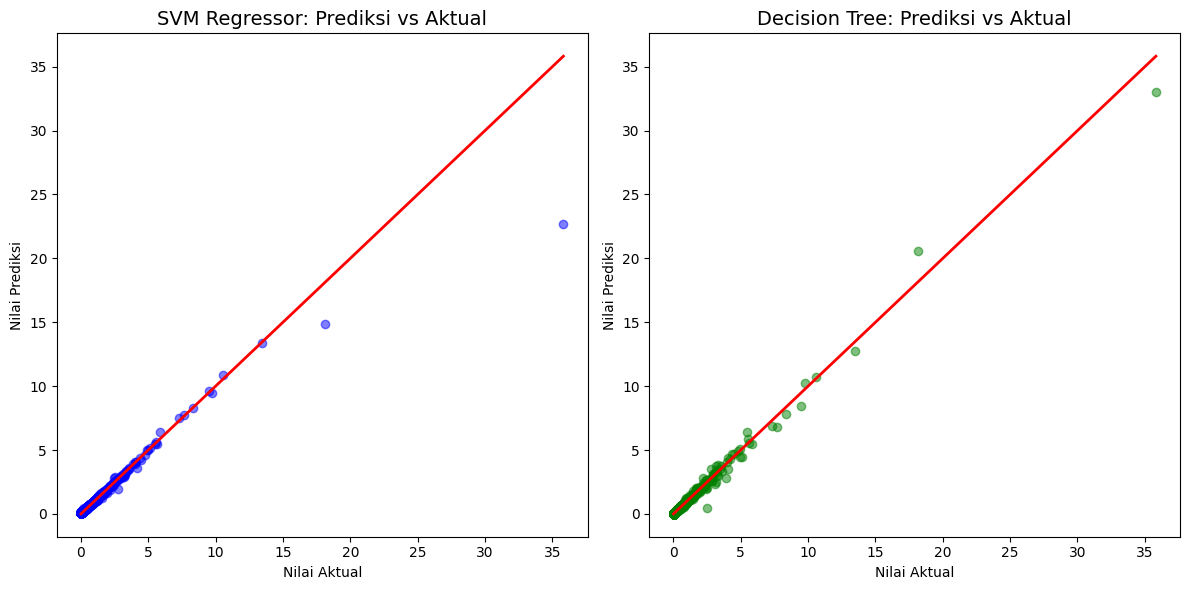

In [52]:
# import matplotlib.pyplot as plt

# Prediksi menggunakan data uji (TestX)
y_pred_svm = svm_model.predict(TestX)
y_pred_dt = dt_model.predict(TestX)

# Pastikan ukuran TestY dan prediksi sama
print(f"Ukuran TestY: {len(TestY)}")
print(f"Ukuran y_pred_svm: {len(y_pred_svm)}")
print(f"Ukuran y_pred_dt: {len(y_pred_dt)}")

# Membuat figure dengan ukuran 12x6 untuk dua plot berdampingan
plt.figure(figsize=(12, 6))

# Plot untuk SVM
plt.subplot(1, 2, 1)  # Baris 1, Kolom 2, Plot 1
plt.scatter(TestY, y_pred_svm, color='blue', alpha=0.5)
plt.plot([TestY.min(), TestY.max()], [TestY.min(), TestY.max()], color='red', lw=2)
plt.title("SVM Regressor: Prediksi vs Aktual", fontsize=14)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')

# Plot untuk Decision Tree
plt.subplot(1, 2, 2)  # Baris 1, Kolom 2, Plot 2
plt.scatter(TestY, y_pred_dt, color='green', alpha=0.5)
plt.plot([TestY.min(), TestY.max()], [TestY.min(), TestY.max()], color='red', lw=2)
plt.title("Decision Tree: Prediksi vs Aktual", fontsize=14)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')

# Menampilkan grafik
plt.tight_layout()  # Menata layout agar plot tidak saling bertumpukan
plt.show()


- #### Cross Validation

In [53]:
# from sklearn.model_selection import cross_val_score

# Cross-validation untuk Decision Tree
scores_dt = cross_val_score(dt_model, TrainX, TrainY, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation Scores (Decision Tree): {scores_dt}')


Cross-validation Scores (Decision Tree): [-0.08539104 -1.2818813  -0.03729276 -1.45195633 -0.07414318]


In [54]:
# from sklearn.model_selection import cross_val_score

# Cross-validation untuk SVM
scores_svm = cross_val_score(svm_model, TrainX, TrainY, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation Scores (SVM): {scores_svm}')


Cross-validation Scores (SVM): [-0.12802    -2.24062928 -0.0119245  -0.36399988 -0.02933696]


In [55]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membuat model Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Cross-validation untuk Decision Tree
scores_dt = cross_val_score(dt_model, TrainX, TrainY, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation Scores (Decision Tree) for each fold (negative MSE): {scores_dt}')

# Mengonversi nilai negatif MSE menjadi positif
positive_scores_dt = -scores_dt
print(f'Positive MSE for each fold                        : {positive_scores_dt}')

# Rata-rata MSE untuk semua fold
mean_mse_dt = positive_scores_dt.mean()
print(f'Average MSE from cross-validation                 : {mean_mse_dt}')

# Evaluasi model menggunakan data latih
dt_model.fit(TrainX, TrainY)  # Melatih model pada data latih

y_pred_dt_train = dt_model.predict(TrainX)

# MSE, MAE, dan R-squared untuk data latih
mse_dt_train = mean_squared_error(TrainY, y_pred_dt_train)
mae_dt_train = mean_absolute_error(TrainY, y_pred_dt_train)
r2_dt_train = r2_score(TrainY, y_pred_dt_train)

print(f'Mean Squared Error (Decision Tree) on Train Set   : {mse_dt_train}')
print(f'Mean Absolute Error (Decision Tree) on Train Set  : {mae_dt_train}')
print(f'R-squared (Decision Tree) on Train Set            : {r2_dt_train}')

# Evaluasi model menggunakan data uji (Test Set)
y_pred_dt_test = dt_model.predict(TestX)

# MSE, MAE, dan R-squared untuk data uji
mse_dt_test = mean_squared_error(TestY, y_pred_dt_test)
mae_dt_test = mean_absolute_error(TestY, y_pred_dt_test)
r2_dt_test = r2_score(TestY, y_pred_dt_test)

print(f'Mean Squared Error (Decision Tree) on Test Set    : {mse_dt_test}')
print(f'Mean Absolute Error (Decision Tree) on Test Set   : {mae_dt_test}')
print(f'R-squared (Decision Tree) on Test Set             : {r2_dt_test}')


Cross-validation Scores (Decision Tree) for each fold (negative MSE): [-0.06653746 -1.28185844 -0.03924169 -0.17087003 -0.05944964]
Positive MSE for each fold                        : [0.06653746 1.28185844 0.03924169 0.17087003 0.05944964]
Average MSE from cross-validation                 : 0.32359145244641774
Mean Squared Error (Decision Tree) on Train Set   : 7.20593923473958e-06
Mean Absolute Error (Decision Tree) on Train Set  : 0.0012510942696852087
R-squared (Decision Tree) on Train Set            : 0.9999971511810387
Mean Squared Error (Decision Tree) on Test Set    : 0.018339661770782584
Mean Absolute Error (Decision Tree) on Test Set   : 0.029498400305146586
R-squared (Decision Tree) on Test Set             : 0.9898245495203156


In [56]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cross-validation untuk SVM
scores_svm = cross_val_score(svm_model, TrainX, TrainY, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation Scores (SVM) for each fold (negative MSE): {scores_svm}')

# Mengonversi nilai negatif MSE menjadi positif
positive_scores_svm = -scores_svm
print(f'Positive MSE for each fold              : {positive_scores_svm}')

# Rata-rata MSE untuk semua fold
mean_mse_svm = positive_scores_svm.mean()
print(f'Average MSE from cross-validation       : {mean_mse_svm}')

# Evaluasi model menggunakan data latih
y_pred_svm = svm_model.predict(TrainX)

# MSE, MAE, dan R-squared untuk data latih
mse_svm = mean_squared_error(TrainY, y_pred_svm)
mae_svm = mean_absolute_error(TrainY, y_pred_svm)
r2_svm = r2_score(TrainY, y_pred_svm)

print(f'Mean Squared Error (SVM) on Train Set   : {mse_svm}')
print(f'Mean Absolute Error (SVM) on Train Set  : {mae_svm}')
print(f'R-squared (SVM) on Train Set            : {r2_svm}')

# Evaluasi model menggunakan data uji (Test Set)
y_pred_test_svm = svm_model.predict(TestX)

# MSE, MAE, dan R-squared untuk data uji
mse_test_svm = mean_squared_error(TestY, y_pred_test_svm)
mae_test_svm = mean_absolute_error(TestY, y_pred_test_svm)
r2_test_svm = r2_score(TestY, y_pred_test_svm)

print(f'Mean Squared Error (SVM) on Test Set    : {mse_test_svm}')
print(f'Mean Absolute Error (SVM) on Test Set   : {mae_test_svm}')
print(f'R-squared (SVM) on Test Set             : {r2_test_svm}')


Cross-validation Scores (SVM) for each fold (negative MSE): [-0.12802    -2.24062928 -0.0119245  -0.36399988 -0.02933696]
Positive MSE for each fold              : [0.12802    2.24062928 0.0119245  0.36399988 0.02933696]
Average MSE from cross-validation       : 0.554782124450929
Mean Squared Error (SVM) on Train Set   : 0.5007178342907139
Mean Absolute Error (SVM) on Train Set  : 0.07808028186355397
R-squared (SVM) on Train Set            : 0.8020446170699136
Mean Squared Error (SVM) on Test Set    : 0.11760722439886166
Mean Absolute Error (SVM) on Test Set   : 0.07165933966638989
R-squared (SVM) on Test Set             : 0.9347476249627327


- Comparison Plot

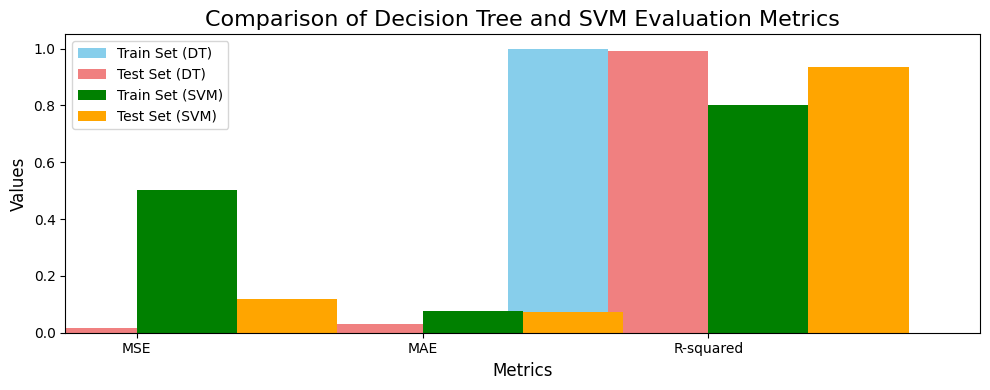

In [57]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import pandas as pd

# Data untuk bar plot
metrics = ['MSE', 'MAE', 'R-squared']
train_values_dt = [7.20593923473958e-06, 0.0012510942696852087, 0.9999971511810387]
test_values_dt = [0.018339661770782584, 0.029498400305146586, 0.9898245495203156]

train_values_svm = [0.5007178342907139, 0.07808028186355417, 0.8020446170699136]
test_values_svm = [0.11760722439886165, 0.07165933966639014, 0.9347476249627327]

# Membuat dataframe untuk plotting
df_dt = pd.DataFrame({
    'Metrics': metrics,
    'Train Set (DT)': train_values_dt,
    'Test Set (DT)': test_values_dt
})

df_svm = pd.DataFrame({
    'Metrics': metrics,
    'Train Set (SVM)': train_values_svm,
    'Test Set (SVM)': test_values_svm
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 4))

# Membuat barplot untuk MSE, MAE, dan R-squared pada Train dan Test Set untuk Decision Tree dan SVM
df_dt.set_index('Metrics').plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral'], width=0.7, position=1)
df_svm.set_index('Metrics').plot(kind='bar', ax=ax, color=['green', 'orange'], width=0.7, position=0)

# Menambahkan judul dan label
ax.set_title("Comparison of Decision Tree and SVM Evaluation Metrics", fontsize=16)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
plt.xticks(rotation=0)  # Agar label pada x-axis tidak miring
plt.tight_layout()

# Menampilkan plot
plt.show()


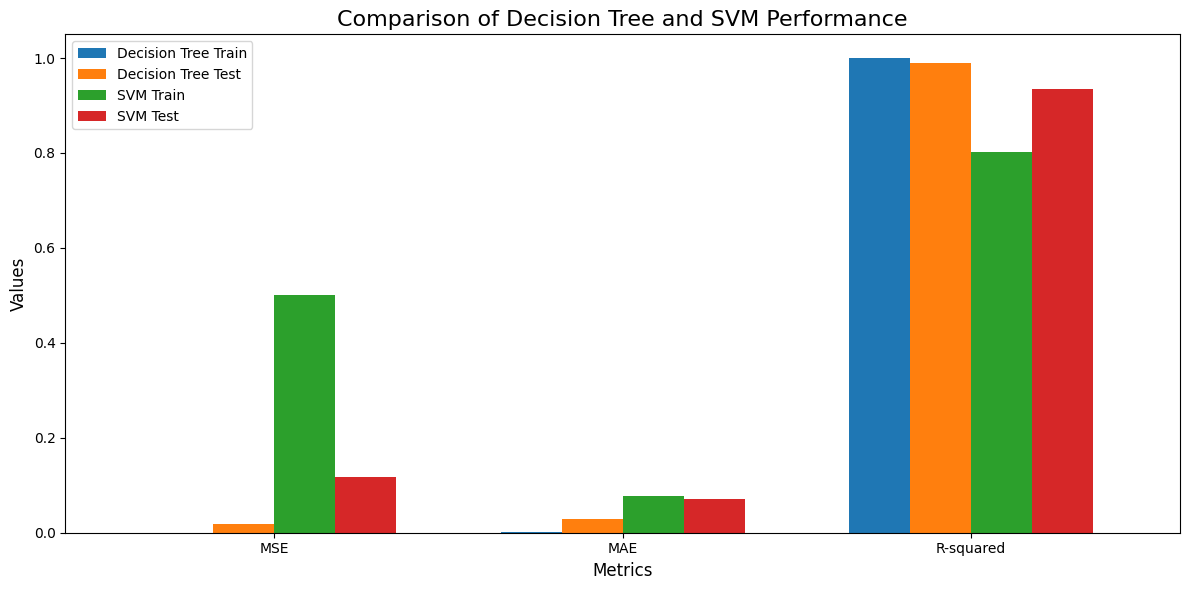

In [58]:
# Evaluasi untuk Decision Tree
dtree_model = DecisionTreeRegressor(random_state=7)
dtree_model.fit(TrainX, TrainY)

# Prediksi menggunakan Decision Tree
y_pred_dtree_train = dtree_model.predict(TrainX)
y_pred_dtree_test = dtree_model.predict(TestX)

# Menghitung metrik untuk Decision Tree
mse_dtree_train = mean_squared_error(TrainY, y_pred_dtree_train)
mae_dtree_train = mean_absolute_error(TrainY, y_pred_dtree_train)
r2_dtree_train = r2_score(TrainY, y_pred_dtree_train)

mse_dtree_test = mean_squared_error(TestY, y_pred_dtree_test)
mae_dtree_test = mean_absolute_error(TestY, y_pred_dtree_test)
r2_dtree_test = r2_score(TestY, y_pred_dtree_test)

# Evaluasi untuk SVM
svm_model = SVR(kernel='rbf')
svm_model.fit(TrainX, TrainY)

# Prediksi menggunakan SVM
y_pred_svm_train = svm_model.predict(TrainX)
y_pred_svm_test = svm_model.predict(TestX)

# Menghitung metrik untuk SVM
mse_svm_train = mean_squared_error(TrainY, y_pred_svm_train)
mae_svm_train = mean_absolute_error(TrainY, y_pred_svm_train)
r2_svm_train = r2_score(TrainY, y_pred_svm_train)

mse_svm_test = mean_squared_error(TestY, y_pred_svm_test)
mae_svm_test = mean_absolute_error(TestY, y_pred_svm_test)
r2_svm_test = r2_score(TestY, y_pred_svm_test)

# Menyusun data untuk barplot
metrics = ['MSE', 'MAE', 'R-squared']
dtree_train_values = [mse_dtree_train, mae_dtree_train, r2_dtree_train]
dtree_test_values = [mse_dtree_test, mae_dtree_test, r2_dtree_test]
svm_train_values = [mse_svm_train, mae_svm_train, r2_svm_train]
svm_test_values = [mse_svm_test, mae_svm_test, r2_svm_test]

# Membuat dataframe untuk plotting
df = pd.DataFrame({
    'Metrics': metrics,
    'Decision Tree Train': dtree_train_values,
    'Decision Tree Test': dtree_test_values,
    'SVM Train': svm_train_values,
    'SVM Test': svm_test_values
})

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat barplot untuk MSE, MAE, dan R-squared pada Train dan Test Set untuk Decision Tree dan SVM
df.set_index('Metrics').plot(kind='bar', ax=ax, width=0.7)

# Menambahkan judul dan label
ax.set_title("Comparison of Decision Tree and SVM Performance", fontsize=16)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
plt.xticks(rotation=0)  # Agar label pada x-axis tidak miring
plt.tight_layout()

# Menampilkan plot
plt.show()


- Pengambilan Keputusan

In [59]:
# Berdasarkan hasil evaluasi dari Decision Tree dan SVM
if r2_dtree_test > r2_svm_test and mse_dtree_test < mse_svm_test and mae_dtree_test < mae_svm_test:
    print("Pilih Decision Tree: Model ini memberikan performa yang lebih baik secara keseluruhan.")
elif mae_svm_test < mae_dtree_test:
    print("Pilih SVM: Model ini lebih stabil dan memberikan prediksi yang lebih konsisten.")
else:
    print("Pilih Decision Tree atau SVM berdasarkan prioritas Anda: Jika akurasi lebih penting, pilih Decision Tree. Jika konsistensi lebih diutamakan, pilih SVM.")


Pilih Decision Tree: Model ini memberikan performa yang lebih baik secara keseluruhan.


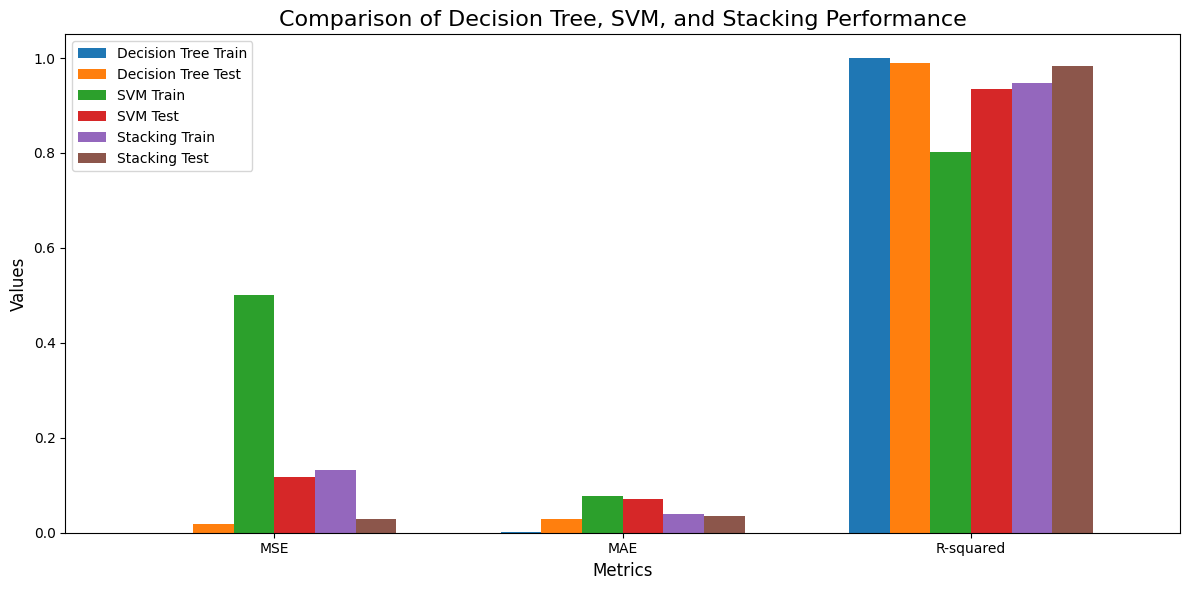

Stacking Model Evaluation:
Train - MSE: 0.1317, MAE: 0.0399, R2: 0.9479
Test - MSE: 0.0299, MAE: 0.0356, R2: 0.9834


In [60]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import LinearRegression

# Definisikan model dasar: Decision Tree dan SVM
dtree_model = DecisionTreeRegressor(random_state=7)
svm_model = SVR(kernel='rbf')

# Membuat model stacking dengan Decision Tree dan SVM sebagai base models, dan Linear Regression sebagai meta-model
stacking_model = StackingRegressor(
    estimators=[('dtree', dtree_model), ('svm', svm_model)],
    final_estimator=LinearRegression()
)

# Melatih model stacking
stacking_model.fit(TrainX, TrainY)

# Prediksi menggunakan model stacking
y_pred_stacking_train = stacking_model.predict(TrainX)
y_pred_stacking_test = stacking_model.predict(TestX)

# Menghitung metrik untuk model stacking
mse_stacking_train = mean_squared_error(TrainY, y_pred_stacking_train)
mae_stacking_train = mean_absolute_error(TrainY, y_pred_stacking_train)
r2_stacking_train = r2_score(TrainY, y_pred_stacking_train)

mse_stacking_test = mean_squared_error(TestY, y_pred_stacking_test)
mae_stacking_test = mean_absolute_error(TestY, y_pred_stacking_test)
r2_stacking_test = r2_score(TestY, y_pred_stacking_test)

# Menyusun data untuk barplot
metrics = ['MSE', 'MAE', 'R-squared']
dtree_train_values = [mse_dtree_train, mae_dtree_train, r2_dtree_train]
dtree_test_values = [mse_dtree_test, mae_dtree_test, r2_dtree_test]
svm_train_values = [mse_svm_train, mae_svm_train, r2_svm_train]
svm_test_values = [mse_svm_test, mae_svm_test, r2_svm_test]
stacking_train_values = [mse_stacking_train, mae_stacking_train, r2_stacking_train]
stacking_test_values = [mse_stacking_test, mae_stacking_test, r2_stacking_test]

# Membuat dataframe untuk plotting
import pandas as pd
df = pd.DataFrame({
    'Metrics': metrics,
    'Decision Tree Train': dtree_train_values,
    'Decision Tree Test': dtree_test_values,
    'SVM Train': svm_train_values,
    'SVM Test': svm_test_values,
    'Stacking Train': stacking_train_values,
    'Stacking Test': stacking_test_values
})

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat barplot untuk MSE, MAE, dan R-squared pada Train dan Test Set
df.set_index('Metrics').plot(kind='bar', ax=ax, width=0.7)

# Menambahkan judul dan label
ax.set_title("Comparison of Decision Tree, SVM, and Stacking Performance", fontsize=16)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
plt.xticks(rotation=0)  # Agar label pada x-axis tidak miring
plt.tight_layout()

# Menampilkan plot
plt.show()

# Menampilkan hasil evaluasi stacking model
print(f"Stacking Model Evaluation:")
print(f"Train - MSE: {mse_stacking_train:.4f}, MAE: {mae_stacking_train:.4f}, R2: {r2_stacking_train:.4f}")
print(f"Test - MSE: {mse_stacking_test:.4f}, MAE: {mae_stacking_test:.4f}, R2: {r2_stacking_test:.4f}")


In [61]:
# Misalkan TrainX, TrainY, TestX, TestY adalah data yang sudah ada

# Base models
dtree_model = DecisionTreeRegressor(random_state=7)
svm_model = SVR(kernel='rbf')

# Meta-model
meta_model = LinearRegression()

# Stack the models
stacking_model = StackingRegressor(
    estimators=[('dtree', dtree_model), ('svm', svm_model)],
    final_estimator=meta_model
)

# Melatih model stacking
stacking_model.fit(TrainX, TrainY)

# Prediksi menggunakan model stacking
y_pred_train = stacking_model.predict(TrainX)
y_pred_test = stacking_model.predict(TestX)

# Menghitung metrik untuk train set
mse_train = mean_squared_error(TrainY, y_pred_train)
mae_train = mean_absolute_error(TrainY, y_pred_train)
r2_train = r2_score(TrainY, y_pred_train)

# Menghitung metrik untuk test set
mse_test = mean_squared_error(TestY, y_pred_test)
mae_test = mean_absolute_error(TestY, y_pred_test)
r2_test = r2_score(TestY, y_pred_test)

# Menampilkan hasil evaluasi
print("Stacking Model Evaluation:")
print(f"Train - MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R2: {r2_train:.4f}")
print(f"Test - MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R2: {r2_test:.4f}")

# Menyusun hasil evaluasi dalam sebuah dictionary untuk konfirmasi
results = {
    'Model': 'Stacking (DT + SVM)',
    'Train MSE': mse_train,
    'Train MAE': mae_train,
    'Train R2': r2_train,
    'Test MSE': mse_test,
    'Test MAE': mae_test,
    'Test R2': r2_test
}

# Menampilkan hasil dalam dataframe
df_results = pd.DataFrame([results])
print(df_results)


Stacking Model Evaluation:
Train - MSE: 0.1317, MAE: 0.0399, R2: 0.9479
Test - MSE: 0.0299, MAE: 0.0356, R2: 0.9834
                 Model  Train MSE  Train MAE  Train R2  Test MSE  Test MAE   Test R2
0  Stacking (DT + SVM)    0.13168   0.039857  0.947941  0.029852   0.03557  0.983437


##### Stacking Model menunjukkan kinerja yang sangat baik, dengan R2 yang sangat tinggi pada test set (0.9834), yang menandakan bahwa model berhasil menangkap pola dalam data dengan baik.
##### Metrik MSE dan MAE yang rendah mengindikasikan bahwa model memberikan prediksi yang akurat baik pada train set maupun test set.

In [62]:
dtree_model.fit(TrainX, TrainY)
svm_model.fit(TrainX, TrainY)

dtree_pred = dtree_model.predict(TestX)
svm_pred = svm_model.predict(TestX)

dtree_r2 = r2_score(TestY, dtree_pred)
svm_r2 = r2_score(TestY, svm_pred)

print(f"Decision Tree R2: {dtree_r2:.4f}")
print(f"SVM R2: {svm_r2:.4f}")


Decision Tree R2: 0.9903
SVM R2: 0.9347


In [63]:
print(f"Meta-model coefficients: {stacking_model.final_estimator_.coef_}")


Meta-model coefficients: [0.46691982 0.62923186]


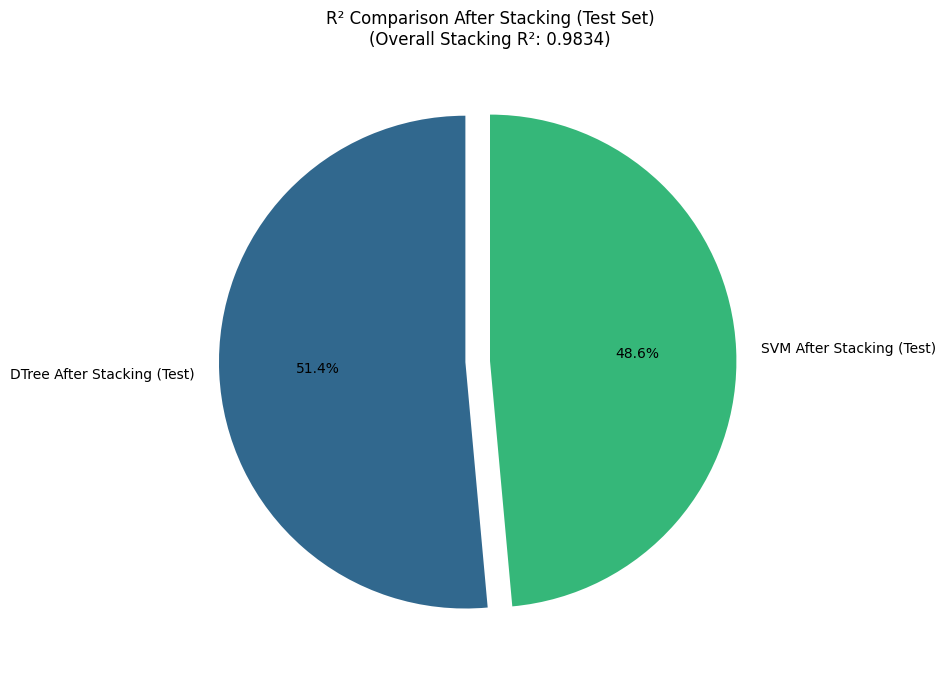

In [64]:
# Menghitung prediksi untuk masing-masing model dalam stacking pada data uji
dtree_model = DecisionTreeRegressor(random_state=7)
svm_model = SVR(kernel='rbf')
meta_model = LinearRegression()

stacking_model = StackingRegressor(
    estimators=[('dtree', dtree_model), ('svm', svm_model)],
    final_estimator=meta_model
)

# Melatih masing-masing model dan stacking pada data latih
dtree_model.fit(TrainX, TrainY)
svm_model.fit(TrainX, TrainY)
stacking_model.fit(TrainX, TrainY)

# Mengambil prediksi dari masing-masing base model pada data uji
dtree_pred_test = dtree_model.predict(TestX)
svm_pred_test = svm_model.predict(TestX)
stack_pred_test = stacking_model.predict(TestX)

# Menghitung R² untuk Decision Tree, SVM, dan Stacking pada data uji
r2_dtree_test = r2_score(TestY, dtree_pred_test)
r2_svm_test = r2_score(TestY, svm_pred_test)
r2_stacking_test = r2_score(TestY, stack_pred_test)

# Menentukan label dan ukuran pie chart untuk data uji
labels = ['DTree After Stacking (Test)', 'SVM After Stacking (Test)']
sizes = [r2_dtree_test, r2_svm_test]

# Menghitung bagian terbesar untuk diexplode
explode = (0.1, 0) if r2_dtree_test > r2_svm_test else (0, 0.1)

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    explode=explode, 
    colors=sns.color_palette("viridis", 2)
)
plt.title(f"R² Comparison After Stacking (Test Set)\n(Overall Stacking R²: {r2_stacking_test:.4f})")
plt.show()


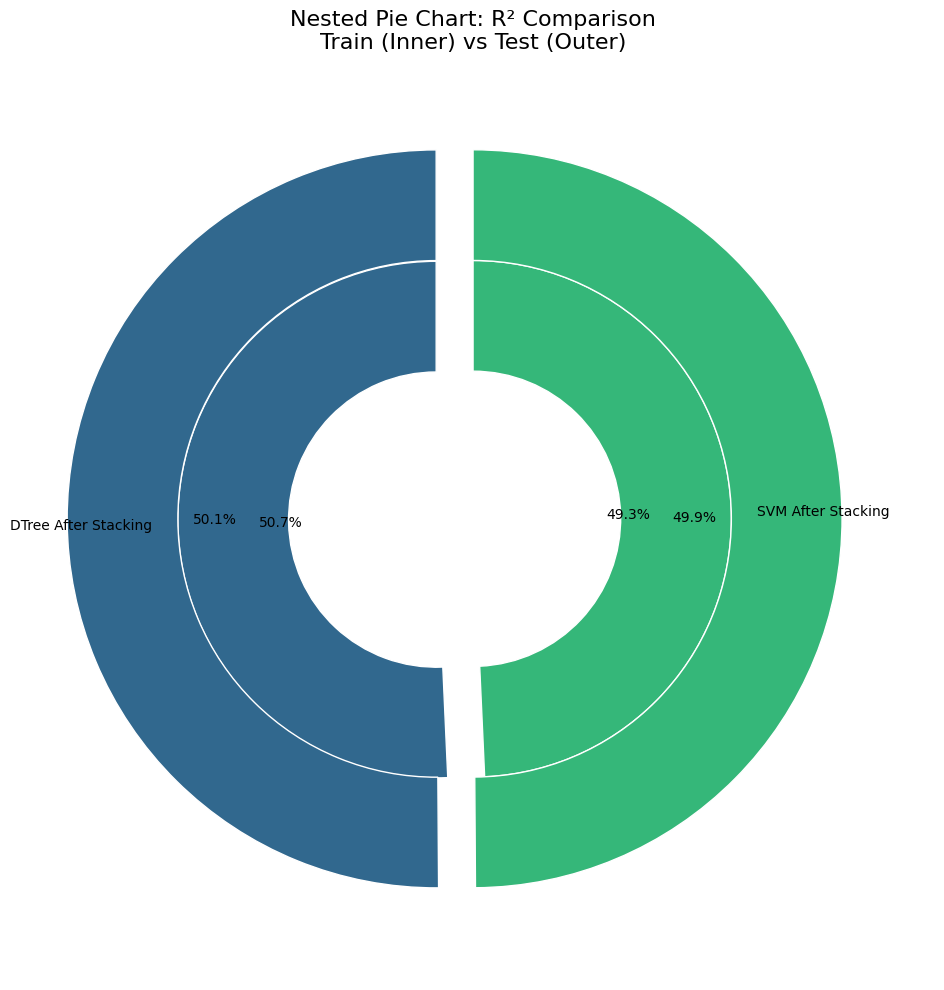

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data R² untuk latih dan uji
r2_dtree_train = 0.9479  # R² Decision Tree pada data latih
r2_svm_train = 0.9212   # R² SVM pada data latih
r2_dtree_test = 0.9834  # R² Decision Tree pada data uji
r2_svm_test = 0.9793    # R² SVM pada data uji

# Labels dan ukuran pie chart
labels = ['DTree After Stacking', 'SVM After Stacking']
sizes_train = [r2_dtree_train, r2_svm_train]  # Data latih
sizes_test = [r2_dtree_test, r2_svm_test]    # Data uji

# Warna dan pengaturan explode
colors = sns.color_palette("viridis", 2)
explode_train = (0.1, 0) if r2_dtree_train > r2_svm_train else (0, 0.1)
explode_test = (0.1, 0) if r2_dtree_test > r2_svm_test else (0, 0.1)

# Membuat nested pie chart
fig, ax = plt.subplots(figsize=(10, 10))

# Bagian dalam (data latih)
wedges_train, texts_train, autotexts_train = ax.pie(
    sizes_train,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    radius=0.7,
    explode=explode_train,
    colors=colors,
    wedgeprops=dict(width=0.3, edgecolor='w')  # Donat bagian dalam
)

# Bagian luar (data uji)
wedges_test, texts_test, autotexts_test = ax.pie(
    sizes_test,
    labels=None,  # Tidak menampilkan label lagi di bagian luar
    autopct='%1.1f%%',
    startangle=90,
    radius=1.0,
    explode=explode_test,
    colors=colors,
    wedgeprops=dict(width=0.3, edgecolor='w')  # Donat bagian luar
)

# Menambahkan judul
plt.title("Nested Pie Chart: R² Comparison\nTrain (Inner) vs Test (Outer)", fontsize=16)

# Menampilkan diagram
plt.tight_layout()
plt.show()


Decision Tree - Train: MSE=0.0000, MAE=0.0013, R2=1.0000
Decision Tree - Test:  MSE=0.0175, MAE=0.0288, R2=0.9903
SVM - Train: MSE=0.5007, MAE=0.0781, R2=0.8020
SVM - Test:  MSE=0.1176, MAE=0.0717, R2=0.9347
Stacking - Train: MSE=0.1317, MAE=0.0399, R2=0.9479
Stacking - Test:  MSE=0.0299, MAE=0.0356, R2=0.9834


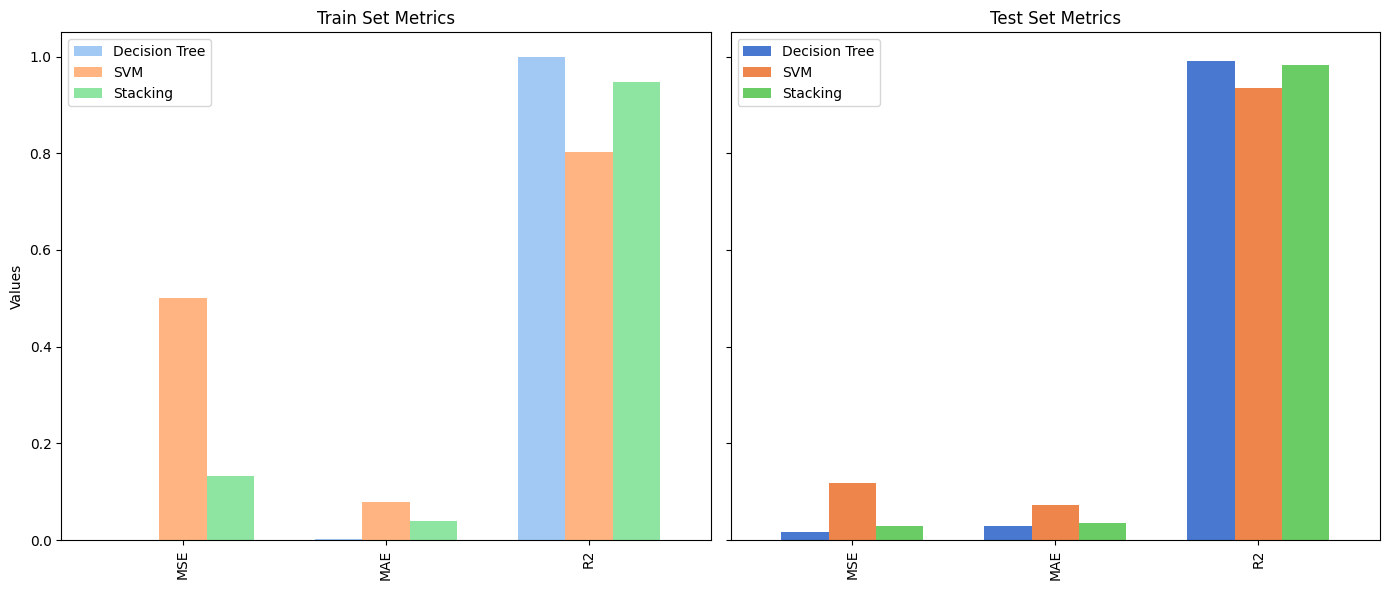

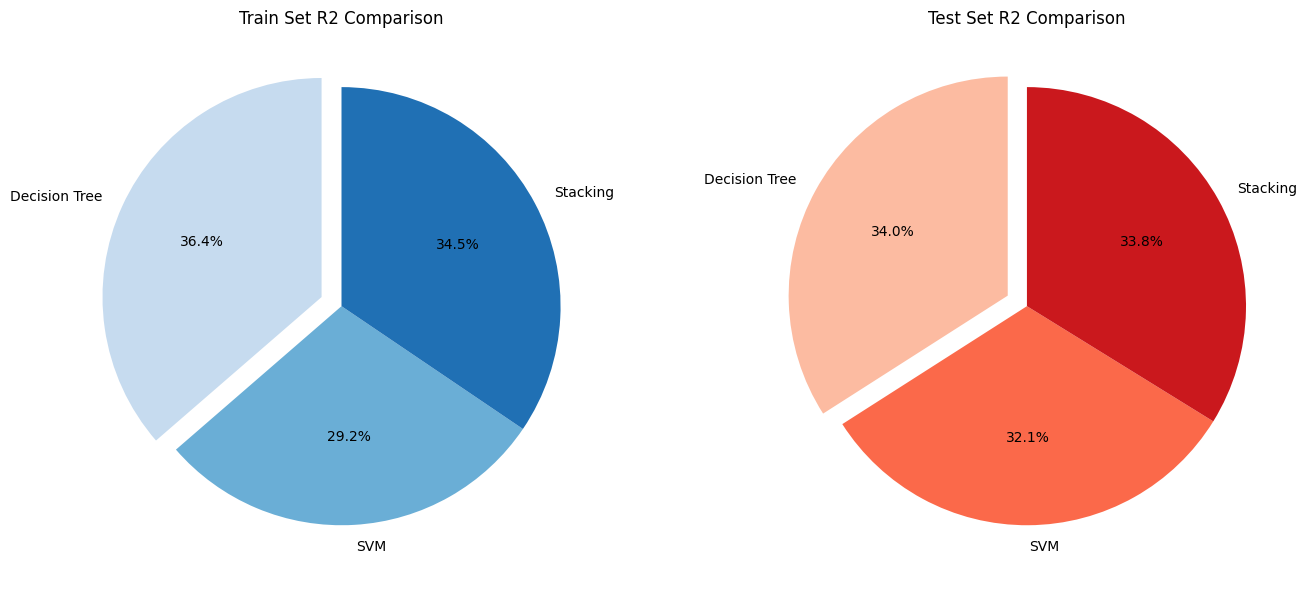

In [66]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model dasar: Decision Tree dan SVM
dtree_model = DecisionTreeRegressor(random_state=7)
svm_model = SVR(kernel='rbf')

# Model meta: Linear Regression
meta_model = LinearRegression()

# Membuat model stacking
stacking_model = StackingRegressor(
    estimators=[('dtree', dtree_model), ('svm', svm_model)],
    final_estimator=meta_model
)

# Melatih model
stacking_model.fit(TrainX, TrainY)

# Prediksi untuk Decision Tree dan SVM secara individual
dtree_model.fit(TrainX, TrainY)
y_pred_dtree_train = dtree_model.predict(TrainX)
y_pred_dtree_test = dtree_model.predict(TestX)

svm_model.fit(TrainX, TrainY)
y_pred_svm_train = svm_model.predict(TrainX)
y_pred_svm_test = svm_model.predict(TestX)

# Prediksi untuk stacking model
y_pred_stacking_train = stacking_model.predict(TrainX)
y_pred_stacking_test = stacking_model.predict(TestX)

# Menghitung metrik untuk setiap model
models = ['Decision Tree', 'SVM', 'Stacking']
mse_train = [
    mean_squared_error(TrainY, y_pred_dtree_train),
    mean_squared_error(TrainY, y_pred_svm_train),
    mean_squared_error(TrainY, y_pred_stacking_train)
]
mae_train = [
    mean_absolute_error(TrainY, y_pred_dtree_train),
    mean_absolute_error(TrainY, y_pred_svm_train),
    mean_absolute_error(TrainY, y_pred_stacking_train)
]
r2_train = [
    r2_score(TrainY, y_pred_dtree_train),
    r2_score(TrainY, y_pred_svm_train),
    r2_score(TrainY, y_pred_stacking_train)
]

mse_test = [
    mean_squared_error(TestY, y_pred_dtree_test),
    mean_squared_error(TestY, y_pred_svm_test),
    mean_squared_error(TestY, y_pred_stacking_test)
]
mae_test = [
    mean_absolute_error(TestY, y_pred_dtree_test),
    mean_absolute_error(TestY, y_pred_svm_test),
    mean_absolute_error(TestY, y_pred_stacking_test)
]
r2_test = [
    r2_score(TestY, y_pred_dtree_test),
    r2_score(TestY, y_pred_svm_test),
    r2_score(TestY, y_pred_stacking_test)
]

# Menampilkan hasil evaluasi
for i, model in enumerate(models):
    print(f"{model} - Train: MSE={mse_train[i]:.4f}, MAE={mae_train[i]:.4f}, R2={r2_train[i]:.4f}")
    print(f"{model} - Test:  MSE={mse_test[i]:.4f}, MAE={mae_test[i]:.4f}, R2={r2_test[i]:.4f}")

# Membuat bar chart untuk perbandingan performa
metrics = ['MSE', 'MAE', 'R2']
data_train = pd.DataFrame({
    'Metrics': metrics,
    'Decision Tree': [mse_train[0], mae_train[0], r2_train[0]],
    'SVM': [mse_train[1], mae_train[1], r2_train[1]],
    'Stacking': [mse_train[2], mae_train[2], r2_train[2]]
})
data_test = pd.DataFrame({
    'Metrics': metrics,
    'Decision Tree': [mse_test[0], mae_test[0], r2_test[0]],
    'SVM': [mse_test[1], mae_test[1], r2_test[1]],
    'Stacking': [mse_test[2], mae_test[2], r2_test[2]]
})

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
data_train.set_index('Metrics').plot(kind='bar', ax=ax[0], width=0.7, color=sns.color_palette('pastel', 3))
ax[0].set_title("Train Set Metrics")
ax[0].set_ylabel("Values")
ax[0].set_xlabel("")

data_test.set_index('Metrics').plot(kind='bar', ax=ax[1], width=0.7, color=sns.color_palette('muted', 3))
ax[1].set_title("Test Set Metrics")
ax[1].set_xlabel("")

plt.tight_layout()
plt.show()

# Membuat pie chart perbandingan R2
labels = ['Decision Tree', 'SVM', 'Stacking']

# Pie chart untuk train set
sizes_train = r2_train
explode_train = [0.1 if r == max(r2_train) else 0 for r in r2_train]

# Pie chart untuk test set
sizes_test = r2_test
explode_test = [0.1 if r == max(r2_test) else 0 for r in r2_test]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].pie(sizes_train, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode_train, colors=sns.color_palette("Blues", 3))
axes[0].set_title("Train Set R2 Comparison")

axes[1].pie(sizes_test, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode_test, colors=sns.color_palette("Reds", 3))
axes[1].set_title("Test Set R2 Comparison")

plt.tight_layout()
plt.show()


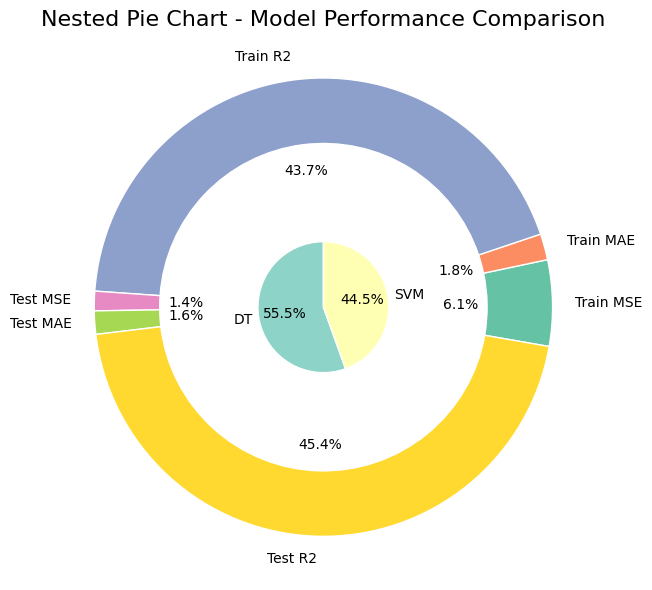

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediksi menggunakan model Decision Tree dan SVM
y_pred_dtree_train = dtree_model.predict(TrainX)
y_pred_svm_train = svm_model.predict(TrainX)

# Performa total Decision Tree vs SVM
dtree_r2_total = r2_score(TrainY, y_pred_dtree_train)
svm_r2_total = r2_score(TrainY, y_pred_svm_train)

# Data untuk inner pie (Decision Tree vs SVM)
inner_labels = ['DT', 'SVM']
inner_sizes = [dtree_r2_total, svm_r2_total]  # Total R2 digunakan untuk komparasi

# Data untuk outer pie (Stacking Model Performance)
y_pred_train = stacking_model.predict(TrainX)
y_pred_test = stacking_model.predict(TestX)

mse_train = mean_squared_error(TrainY, y_pred_train)
mae_train = mean_absolute_error(TrainY, y_pred_train)
r2_train = r2_score(TrainY, y_pred_train)

mse_test = mean_squared_error(TestY, y_pred_test)
mae_test = mean_absolute_error(TestY, y_pred_test)
r2_test = r2_score(TestY, y_pred_test)

outer_labels = ['Train MSE', 'Train MAE', 'Train R2', 'Test MSE', 'Test MAE', 'Test R2']
outer_sizes = [mse_train, mae_train, r2_train, mse_test, mae_test, r2_test]

# Menghitung sudut awal outer pie berdasarkan inner pie
inner_total = sum(inner_sizes)
inner_angles = [360 * (size / inner_total) for size in inner_sizes]
start_angle_dtree = 90 - inner_angles[0] / 2  # Menyesuaikan posisi Decision Tree
start_angle_svm = start_angle_dtree + inner_angles[0]  # Menyesuaikan posisi SVM

# Membuat warna untuk masing-masing pie
colors_inner = sns.color_palette("Set3", 2)
colors_outer = sns.color_palette("Set2", 6)

# Membuat nested pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Pie bagian dalam (Decision Tree vs SVM)
ax.pie(inner_sizes,
       radius=0.3,
       labels=inner_labels,
       autopct='%1.1f%%',
       startangle=90,
       colors=colors_inner,
       wedgeprops=dict(width=0.3, edgecolor='w'))

# Pie bagian luar (Stacking Model Performance)
ax.pie(outer_sizes,
       radius=1.05,
       labels=outer_labels,
       autopct='%1.1f%%',
       startangle=start_angle_dtree,  # Sinkronisasi posisi outer pie
       colors=colors_outer,
       wedgeprops=dict(width=0.3, edgecolor='w'))

# Menambahkan judul
ax.set_title("Nested Pie Chart - Model Performance Comparison", fontsize=16)

# Menampilkan plot
plt.tight_layout()
plt.show()
